# This is our workspace for data analysis!

In [20]:
# feel free to add more
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
import statsmodels.api as sm
import queries

In [21]:
# Create connection to atlas
conn_atlas = sqlite3.connect('./atlas.db')
c_atlas = conn_atlas.cursor()

In [22]:
c_atlas.execute(queries.LIST_TABLES_CMD)
conn_atlas.commit()

for row in c_atlas:
  print(row)

# can switch to 2015 or 2017
c_atlas.execute(queries.LIST_COLUMNS_CMD_ATLAS)
conn_atlas.commit()

for column in c_atlas:
    print(column)

('Atlas_of_Surveillance_20201007',)
('acs2017_county_data',)
('acs2015_county_data',)
(0, 'AOSNUMBER', 'TEXT', 0, None, 0)
(1, 'City', 'TEXT', 0, None, 0)
(2, 'County', 'TEXT', 0, None, 0)
(3, 'State', 'TEXT', 0, None, 0)
(4, 'Agency', 'TEXT', 0, None, 0)
(5, 'Type of LEA', 'TEXT', 0, None, 0)
(6, 'Summary', 'TEXT', 0, None, 0)
(7, 'Type of Juris', 'TEXT', 0, None, 0)
(8, 'Technology', 'TEXT', 0, None, 0)
(9, 'Vendor', 'TEXT', 0, None, 0)
(10, 'Link 1', 'TEXT', 0, None, 0)
(11, 'Link 1 Snapshot', 'TEXT', 0, None, 0)
(12, 'Link 1 Source', 'TEXT', 0, None, 0)
(13, 'Link 1 Type', 'TEXT', 0, None, 0)
(14, 'Link 1 Date', 'TEXT', 0, None, 0)
(15, 'Link 2', 'TEXT', 0, None, 0)
(16, 'Link 2 Snapshot', 'TEXT', 0, None, 0)
(17, 'Link 2 Source', 'TEXT', 0, None, 0)
(18, 'Link 2 Type', 'TEXT', 0, None, 0)
(19, 'Link 2 Date', 'TEXT', 0, None, 0)
(20, 'Link 3', 'TEXT', 0, None, 0)
(21, 'Link 3 Snapshot', 'TEXT', 0, None, 0)
(22, 'Link 3 Source', 'TEXT', 0, None, 0)
(23, 'Link 3 Type', 'TEXT', 0, Non

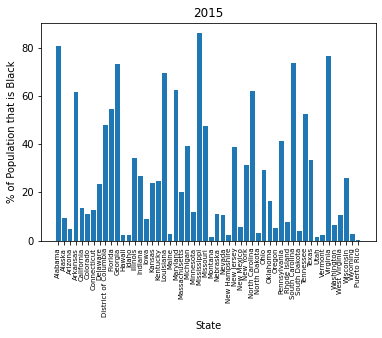

In [23]:
# Feel free to change to demographic groups
cursor_2015_black = conn_atlas.cursor()
cursor_2015_black.execute(queries.SELECT_BLACK_2015)

cursor_2015_state = conn_atlas.cursor()
cursor_2015_state.execute(queries.SELECT_STATE_2015)
black_2015 = [float(a[0]) for a in cursor_2015_black]
state_2015 = [a[0] for a in cursor_2015_state]

plot_state_race = plt.bar(state_2015, black_2015)
plt.title('2015')
plt.xlabel('State')
plt.ylabel('% of Population that is Black')
plt.xticks(fontsize=7, rotation=90)
plt.show()

# OLS workspace
- array with number of each race in a county (multiply percentage by total pop)
- array with total number of surveillance devices in a county (need SQL query for this)
    - SQL query to join 

In [24]:
# Number of black people in each county
# black_2015

# Feel free to change to demographic groups
cursor_2015_total_pop = conn_atlas.cursor()
cursor_2015_total_pop.execute(queries.SELECT_TOTAL_POP_2015)
total_pop_2015 = [float(a[0]) for a in cursor_2015_total_pop]
total_pop_black_2015 = []
for i in range(len(total_pop_2015)) :
    total_pop_black_2015.append(total_pop_2015[i] * black_2015[i])

In [25]:
c_atlas = conn_atlas.cursor()
c_atlas.execute(queries.DISTINCT_TECH)
conn_atlas.commit()
for row in c_atlas:
    print(row)

c_atlas = conn_atlas.cursor()
c_atlas.execute(queries.JOIN_QUERY)
conn_atlas.commit()


('Body-worn Cameras',)
('Gunshot Detection',)
('Automated License Plate Readers',)
('Predictive Policing',)
('Face Recognition',)
('Drones',)
('Camera Registry',)
('Cell-site Simulator',)
('Video Analytics/Computer Vision',)
('Fusion Center',)
('Real-Time Crime Center',)
('Ring/Neighbors Partnership',)


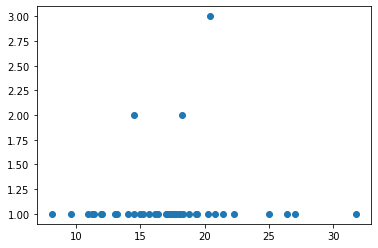

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.1574
Date:                Wed, 21 Oct 2020   Prob (F-statistic):              0.694
Time:                        22:39:41   Log-Likelihood:                -17.271
No. Observations:                  42   AIC:                             38.54
Df Residuals:                      40   BIC:                             42.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0110      0.220      4.596      0.0

In [26]:
# x should be number of a demographic group per county
# y should be number of cameras found

# map of county -> number of cameras in that county
cameras_per_county = collections.Counter([row[2] for row in c_atlas])

# map of county -> percentage of Black people in that county
pop_black = {}
cameras_per_capita = {}
c_atlas = conn_atlas.cursor()
c_atlas.execute(queries.JOIN_QUERY)
conn_atlas.commit()
poverty_per_capita = {}
for row in c_atlas :
    percent_black, total_pop, county_state, poverty = row
    pop_black[county_state] = float(percent_black)
    cameras_per_capita[county_state] = float(cameras_per_county[county_state]) # / float(total_pop)
    poverty_per_capita[county_state] = float(poverty)
x = []
y = []
for county_state in cameras_per_capita :
    y.append(cameras_per_capita[county_state])
    x.append(poverty_per_capita[county_state])
x, y = np.array(x), np.array(y)
plt.scatter(x, y)
plt.show()
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

# KNN Workspace

In [27]:
c_atlas = conn_atlas.cursor()
c_atlas.execute(ML_DATA_QUERY)
conn_atlas.commit()


# dictionary going from County_state -> numpy array of features for that county_state -> numpy 2d array
features_map = {}
cameras_per_county = collections.Counter([row[0] for row in c_atlas])
c_atlas = conn_atlas.cursor()
c_atlas.execute(queries.ML_DATA_QUERY)
conn_atlas.commit()
nums = []
for val in cameras_per_county.values() :
    nums.append(float(val))
a = np.percentile(np.array(nums), 25, axis=None, out=None)
b = np.percentile(np.array(nums), 50, axis=None, out=None)
c = np.percentile(np.array(nums), 75, axis=None, out=None)
d = np.percentile(np.array(nums), 100, axis=None, out=None)

for row in c_atlas :
    county = row[0]
    features_map[county] = np.asarray(row[1:len(row)], dtype=np.float32)

NameError: name 'ML_DATA_QUERY' is not defined

In [ ]:
for county in cameras_per_county :
    num_cams = cameras_per_county[county]
    if num_cams <= a :
        cameras_per_county[county] = 0.0
    elif num_cams <= b :
        cameras_per_county[county] = 1.0
    elif num_cams <= c :
        cameras_per_county[county] = 2.0
    elif num_cams <= d :
        cameras_per_county[county] = 3.0
X = []

# labels
y = []
for county in cameras_per_county :
    X.append(features_map[county])
    y.append(cameras_per_county[county])

X = np.array(X)
y = np.array(y)
    
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 
# knn = KNeighborsClassifier(n_neighbors=5) 
# knn.fit(X_train, y_train) 

accuracies = []
for i in range(1, 250):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, pred_i)
    accuracies.append(acc)
    print(acc)
print(max(accuracies))

plt.figure(figsize=(10,6))
plt.plot(range(1,250),accuracies,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

print(len(set(y_test)))
